### Weighted loss =
- Summation { W(i)* [(y(i) - h0(X(i))]**2 }
- weighted avg. loss = Summation { W(i)* [(y(i) - h0(X(i))]**2 }/m


- where , W(i) = e**(-)(X(i) - X)/2(tou)**2
- X(i) is any point in datset and X  is a query  point
- W(i) lies between 0 and 1 , distance is large w(i) is zero,
- If query point X is very close to X(i) , it means w(i) is 1 .
- tou is the bandwidth parameter :It controls how much weight should fall
- This is a  Non - algorithm , It has no general partameters, but for every query point we generate right sets of theta
-  We can get right set of theta using closed form solution , gradient descent method, newton descent , where GD and ND are iterative approaches
because of this we have iterate for every query point
- that is why we will use closed form solution

### Closed form solution Locally Weighted solution 

- Summation { W(i)* [(y(i) - h0(X(i))]**2 }
- Using property of diagonal matrix w(i) is scalar and is different for every i where i <= m.
- W(i) a diagonal matrix with weight of each qurey point.
- We use diagonal matrix method, where diagonal matrix is W: This W matrix contains the weight of each query point on it's diagonal elements
- we  will get 1X1 matrix after solving all 3 matrix , where 
- matrix  M is:  (X0 -Y)^T W (X0 -Y) using the property
-         (X0 -T)**2   =     (X0 -Y)(X0 -Y)^T


### Minimizing the error j(0):
- we need to find the derivative of X0 -Y)^T W (X0 -Y)
- Theta = {[X(T)WX]^(-1)}X(T)WY 

### Properties of Locally weighted LR
- This non parametric algo : Which means we can't have theta values which
- Can learn the entire function, but for every query point we can find 
the values of theta 
- W is mXm matrix 
- Tou isa  hyper parameter : Needs to be  find out 


### Locally Weighted Regression :
- Read and normalise the dataset
- Generate W for every query point!!
- No training is involved , directly make predictions using closed form solution we drived!! Theta = {[X(T)WX]^(-1)}X(T)WY
-  Find the best value of Tau(Bandwidth PArameter)[Cross Validation]

### Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dfx = pd.read_csv("weightedX.csv")

In [3]:
dfx.shape # 1 prediction

(99, 1)

In [4]:
dfy = pd.read_csv("weightedY.csv")

In [5]:
dfy.shape # 1 prediction

(99, 1)

### Converting files to numpy:

In [6]:
X = dfx.values
Y = dfy.values

### Normalize the data :

In [7]:
X = (X - X.mean())/X.std()

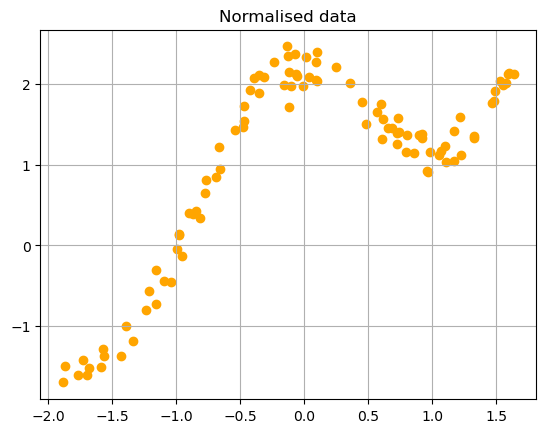

In [52]:
plt.title("Normalised data")
plt.scatter(X, Y, color = "orange")
plt.grid()
plt.show()
#not a linear data , we have so may different theat for every query point.
#there is no generic theta.
# we will calculate theta for different query points.

### Computing W: MXM  diagonal matrix

In [8]:
print(type(np.eye(5)))

<class 'numpy.ndarray'>


In [10]:
np.eye((5)) # identity matrix

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [9]:
print(type(np.mat(np.eye(5))))

<class 'numpy.matrix'>


### Difference between numpy array and numpy matrix :
- If A*B  are matrix then --->> matrix multiplication
- If A*B  are arrays then --->> element wise product

In [13]:
def getW(query_point, X, tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        
        x = query_point
        #weight for every training point
        #W(i) = e**(-)(X(i) - X)/2(tou)**2
        W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))
    return W
    

In [74]:
import warnings

In [14]:
X = np.mat(X)
Y = np.mat(Y)
M = X.shape[0]

W = getW(-1, X, 1)
print(W.shape)
print(W)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


/var/folders/0g/gncbjng119bfmgrln89xprd00000gn/T/ipykernel_5623/1693132499.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))


- For a given point if we have a large tau , than most of the points , will contribute to the finding the theta for a that particular given point
- What we want is:   keep the value of tau less because with lesser tau value  points in vicinity of query point  can contribute more towards theta, this will be more impactfull  and accurtate theta 

In [15]:
W = getW(-1, X, 0.5)
print(W.shape)
print(W)

(99, 99)
[[4.37461134e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.35741601e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.34593282e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.29054046e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  5.78787793e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 5.21221566e-05]]


/var/folders/0g/gncbjng119bfmgrln89xprd00000gn/T/ipykernel_5623/1693132499.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))


### Making Prediction:

In [20]:
ones = np.ones((M, 1))
X_new = np.hstack((X, ones))
print(X_new.shape)
print(X_new[:5, :])

(99, 2)
[[-0.35705077  1.        ]
 [-0.8177695   1.        ]
 [-0.35449839  1.        ]
 [ 0.56434066  1.        ]
 [-0.0695723   1.        ]]


In [47]:
def prediction(X, Y, query_x, tau):
    ones = np.ones((M, 1))
    X_new = np.hstack((X, ones))
    qx = np.mat([query_x,1])
#converting my query feature which is vector
# converting it into 2d matrix
    W  = getW(qx, X_new , tau)
    
# Theta = (X(T)WX)inv * X(T)WY)
    theta = np.linalg.pinv(X_new.T*(W*X_new))*(X_new.T*(W*Y))

    pred = np.dot(qx, theta)
    # to get the value predicted value of Y using lowless 
    # summation {theta(i)*X(i)}
    return theta, pred

In [48]:
X.shape, Y.shape

((99, 1), (99, 1))

In [49]:
theta, pred =prediction(X, Y, 5.0, 1)
print(theta)# it is each query point 
# so the theta is for point 5.0 and prediction is done for 5.0 only
print(pred)

[[1.16772402]
 [0.13486919]]
[[5.97348929]]


/var/folders/0g/gncbjng119bfmgrln89xprd00000gn/T/ipykernel_5623/1693132499.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))


In [50]:
print(theta.shape)
print(pred.shape)

(2, 1)
(1, 1)


In [51]:
#theta nod = 2
#theta_one = 1

### Effect of Bandwidth Parameter:
- Visualize Predictions, Analysis of Tau

In [52]:
def plotprediction(tau):
    X_test = np.linspace(-2, 2, 20)
    Y_test = []
    for xq in X_test:
        theta, pred = prediction(X, Y, xq, tau)
        Y_test.append(pred)# matrix needs to be extracted
    Y_test = np.array(Y_test)# converting list to array, for matplotlib 
    X_array=np.array(X)#for matplotlib we have to convert this into array
    Y_array = np.array(Y)
    plt.title("Tau/Bandwidth vs %.1f"%tau)
    plt.scatter(X_array, Y_array) 
    plt.scatter(X_test, Y_test, color = "orange")
    plt.grid()
    plt.show()
         

In [54]:
X_test = np.linspace(-2, 2, 20)
Y_test = []
for xq in X_test:
        theta, pred = prediction(X, Y, xq, 0.1)
        Y_test.append(pred)

/var/folders/0g/gncbjng119bfmgrln89xprd00000gn/T/ipykernel_5623/1693132499.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))


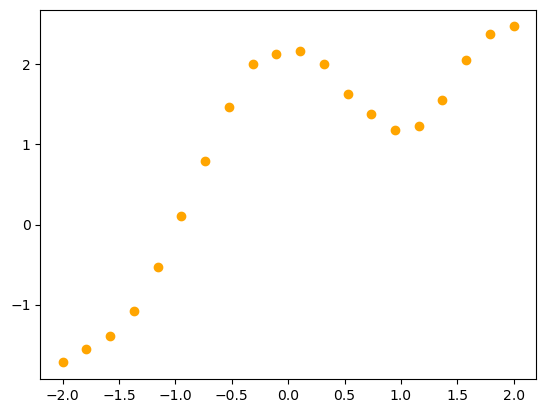

In [56]:
Y_test = np.array(Y_test)# converting list to array, for matplotlib 
plt.scatter(X_test, Y_test, color = "orange")
plt.show()

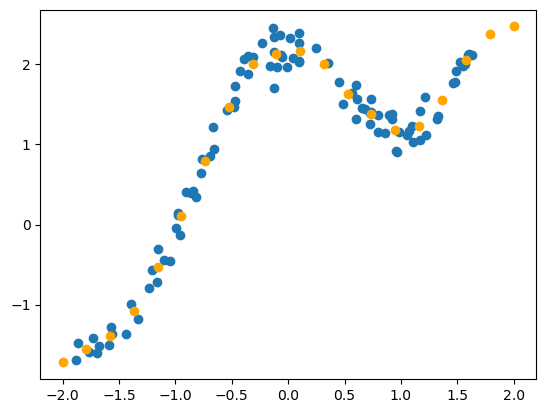

In [60]:
X_array=np.array(X)#for matplotlib we have to convert this into array
Y_array = np.array(Y)
plt.scatter(X_array, Y_array)
plt.scatter(X_test, Y_test, color = "orange")

In [28]:
X_test = np.linspace(-2, 2, 20)
X_test

array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ])

/var/folders/0g/gncbjng119bfmgrln89xprd00000gn/T/ipykernel_5623/1693132499.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))


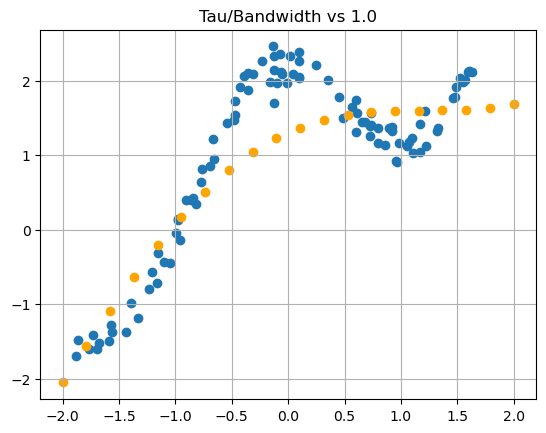

In [29]:
plotprediction(1)

/var/folders/0g/gncbjng119bfmgrln89xprd00000gn/T/ipykernel_5623/1693132499.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))


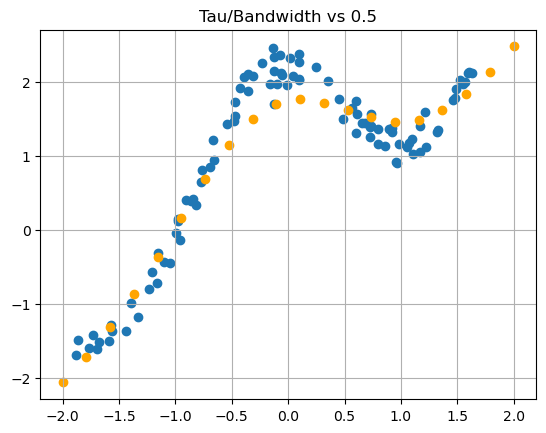

In [30]:
plotprediction(0.5)

/var/folders/0g/gncbjng119bfmgrln89xprd00000gn/T/ipykernel_5623/1693132499.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))


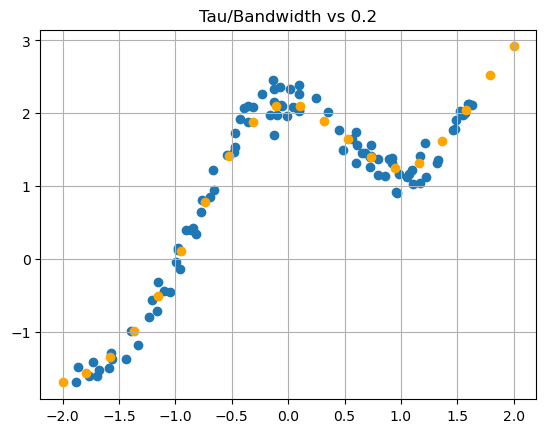

In [31]:
plotprediction(0.2)

/var/folders/0g/gncbjng119bfmgrln89xprd00000gn/T/ipykernel_5623/1693132499.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, i] = np.exp(np.dot((X[i]-x), (X[i]-x).T)/(-2*(tau**2)))


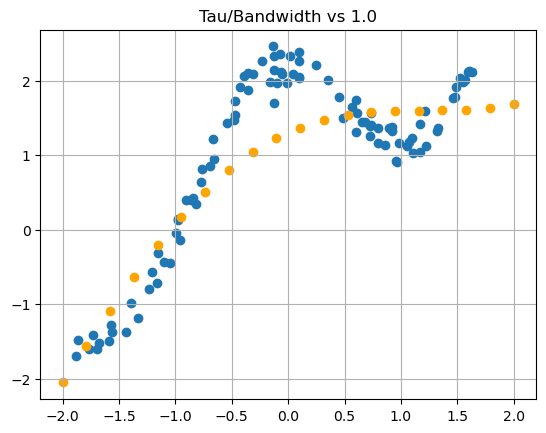

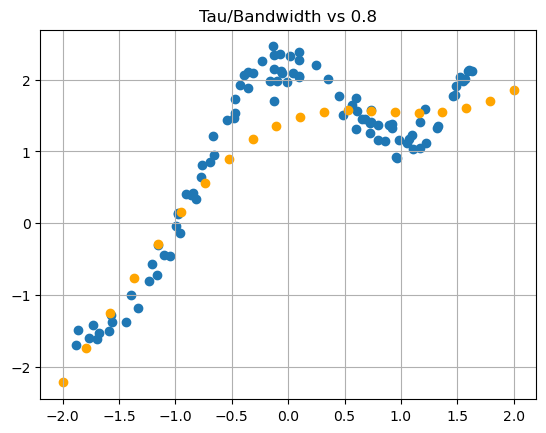

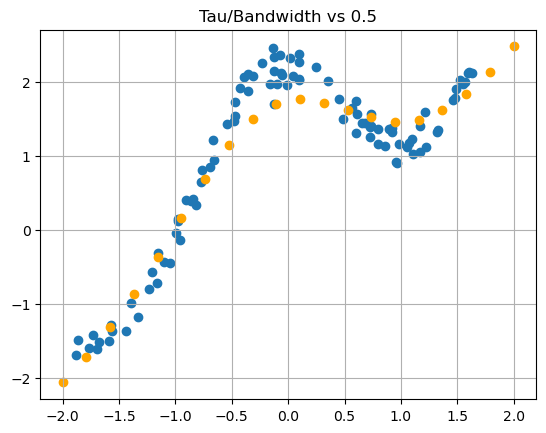

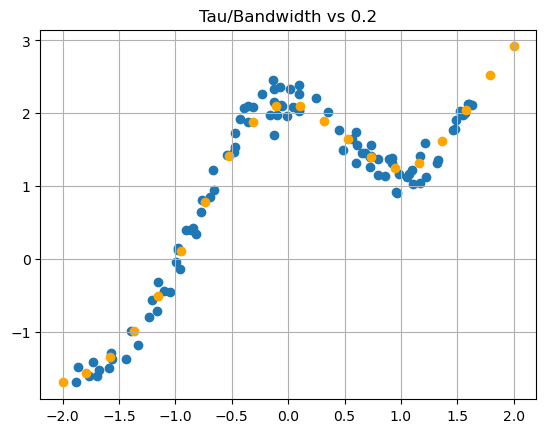

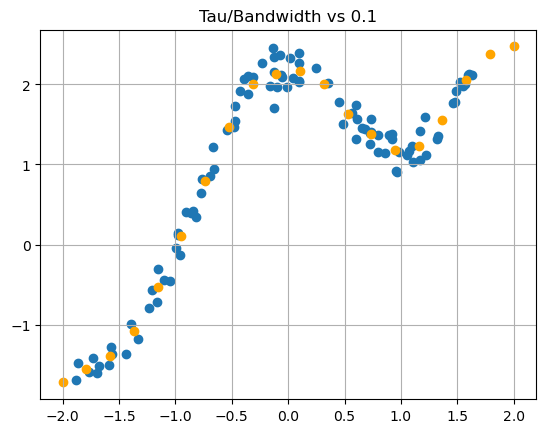

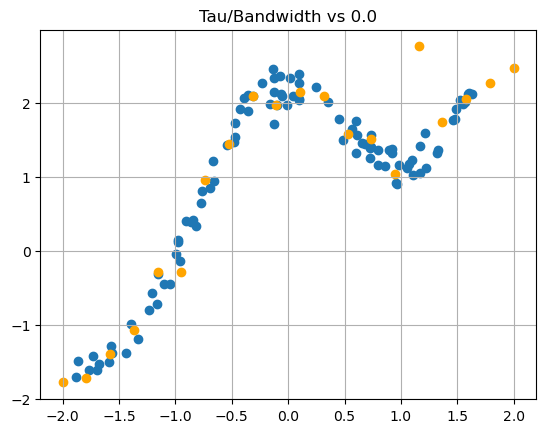

In [32]:
taus = [1, 0.8, 0.5, 0.2 , 0.1, 0.01]
for t in taus:
    plotprediction(t)